In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

In [6]:
file_path = os.getcwd() + '\Addictions Outcomes.xlsx'
xl = pd.ExcelFile(file_path)
sheets = xl.sheet_names

print(sheets) 

['Data Sheet', 'Actuals', 'Pre-covid forecast', 'Inv Model Forecasts']


In [258]:
ind_df = pd.read_excel(file_path, sheet_name = sheets[0])
pd.set_option('display.max_columns', None) 

In [162]:
## Subsetting dataframe for non-null values for datapoint - 'time since last job' 
tslj_df = ind_df[ind_df['Time since last job'].notnull()].reset_index(drop =True)

## Subsetting for engagements 
engaged = tslj_df[tslj_df['Date Vocational Profile complete'].notnull()]
eng_grouped = engaged.groupby('Time since last job').agg({'Client ID' : 'nunique',
                                                          'Date WDP aware of Job Start': 'count'}).rename(columns = {'Client ID': 'Number',
                                                                                                                     'Date WDP aware of Job Start':'Job Starts'})

## Subsetting for job starts
job_starts = tslj_df[tslj_df['Date WDP aware of Job Start'].notnull()]
js_grouped = job_starts.groupby('Time since last job').agg({'Client ID' : 'nunique',
                                                            'Date WDP aware of  13 week outcome': 'count'}).rename(columns = {'Client ID': 'Number',
                                                                                                                     'Date WDP aware of  13 week outcome':'Sustainments'})

## Subsetting for sustainments
sustainments = tslj_df[tslj_df['Date WDP aware of  13 week outcome'].notnull()]
sust_grouped = sustainments.groupby('Time since last job').nunique()[['Client ID']].rename(columns = {'Client ID': 'Number'})

for x in [eng_grouped, sust_grouped, js_grouped]:
    x.drop('Never Worked', inplace=True)

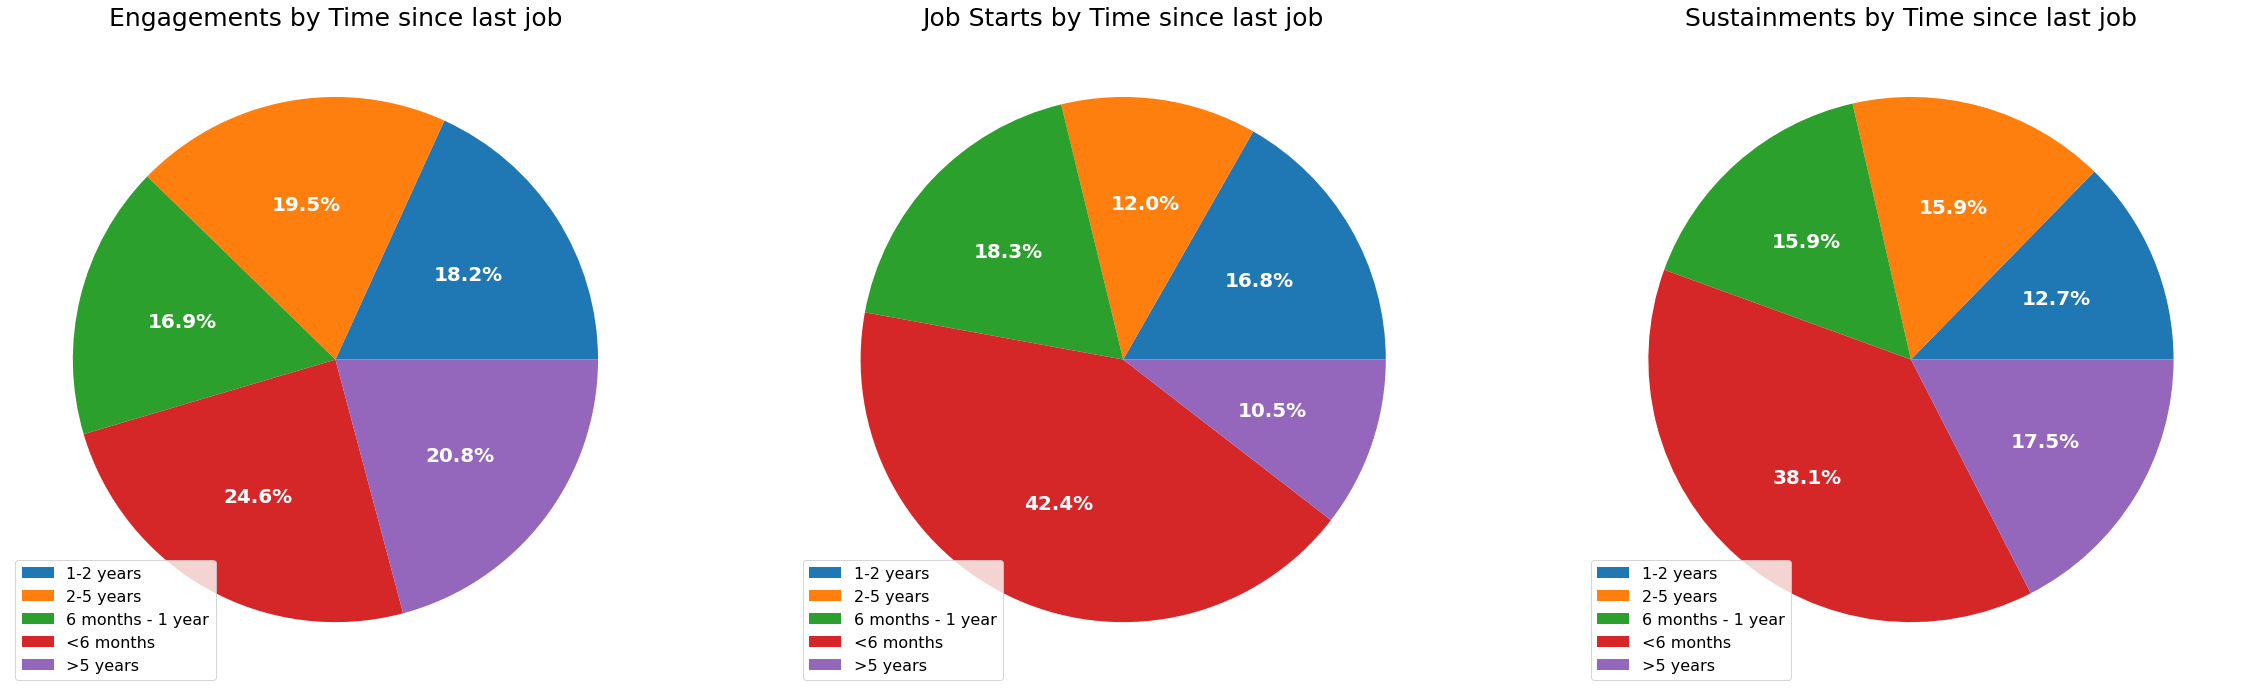

In [165]:
# Pie Chart Plots
fig = plt.figure(figsize = (40, 40))

# engagements
plt.subplot(1,3,1)
plt.pie(eng_grouped['Number'], autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white', 'weight':'bold'})
plt.legend(eng_grouped.index.values, fontsize = 16, ncol=1, loc='lower left')
plt.title('Engagements by Time since last job', fontsize = 25)

# job starts
plt.subplot(1,3,2)
plt.pie(js_grouped['Number'], autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white', 'weight':'bold'})
plt.legend(js_grouped.index.values, fontsize = 16, ncol=1, loc='lower left')
plt.title('Job Starts by Time since last job', fontsize = 25)

# sustainments
plt.subplot(1,3,3)
plt.pie(sust_grouped['Number'],autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white', 'weight':'bold'})
plt.legend(sust_grouped.index.values, fontsize = 16, ncol=1, loc = 'lower left')
plt.title('Sustainments by Time since last job', fontsize = 25)

plt.show()

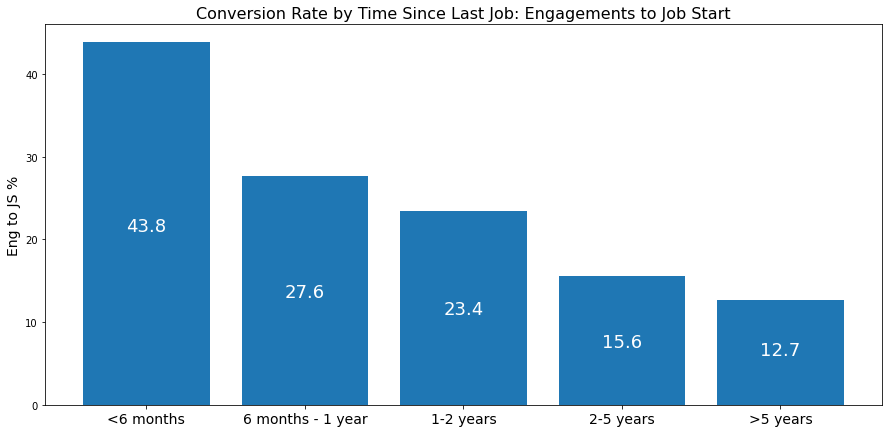

In [218]:
eng_grouped['Eng to JS %'] = round(eng_grouped['Job Starts']/ eng_grouped['Number'] * 100,1)
eng_grouped['order'] = [3,4,2,1,5]
eng_grouped = eng_grouped.sort_values(by = 'order')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'w', fontsize = 18)

fig = plt.figure(figsize = (15,7))
plt.title('Conversion Rate by Time Since Last Job: Engagements to Job Start', fontsize =16)
plt.bar(eng_grouped.index.values ,eng_grouped['Eng to JS %'])
plt.ylabel('Eng to JS %', fontsize = 14)
plt.xticks(fontsize=14)
addlabels(eng_grouped.index.values, eng_grouped['Eng to JS %'])
plt.show()

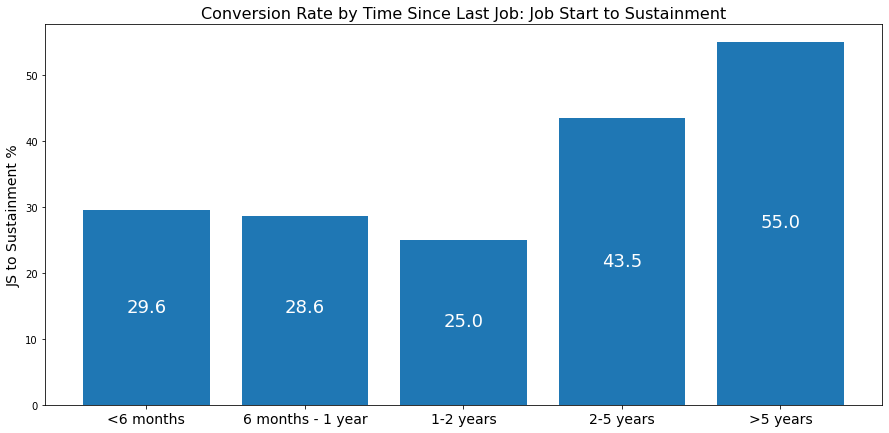

In [167]:
js_grouped['JS to Sustainment %'] = round(js_grouped['Sustainments']/ js_grouped['Number'] * 100,1)
js_grouped['order'] = [3,4,2,1,5]
js_grouped = js_grouped.sort_values(by = 'order')

fig = plt.figure(figsize = (15,7))
plt.title('Conversion Rate by Time Since Last Job: Job Start to Sustainment', fontsize =16)
plt.bar(js_grouped.index.values ,js_grouped['JS to Sustainment %'])
plt.ylabel('JS to Sustainment %', fontsize = 14)
plt.xticks(fontsize=14)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'w', fontsize = 18)
addlabels(js_grouped.index.values ,js_grouped['JS to Sustainment %'])
plt.show()

In [257]:
adj_eng = engaged[np.logical_or(engaged['Date Vocational Profile complete'] < '2021-03-01', engaged['Date of Job start'].notnull())]
adj_eng_grp = adj_eng.groupby('Time since last job').agg({'Client ID' : 'nunique',
                                                          'Date of Job start': 'count'}).rename(columns = {'Client ID': 'Number',
                                                                                                            'Date of Job start': 'Job Starts'})
adj_eng_grp['Adj Eng to JS %'] = round(adj_eng_grp['Job Starts']/adj_eng_grp['Number']*100, 1)
adj_eng_grp.drop('Never Worked', inplace=True)
adj_eng_grp['order'] = [3,4,2,1,5]
adj_eng_grp = adj_eng_grp.sort_values(by = 'order')
adj_eng_grp

,Number,Job Starts,Adj Eng to JS %,order
Time since last job,,,,
<6 months,174,81,46.6,1
6 months - 1 year,115,35,30.4,2
1-2 years,124,32,25.8,3
2-5 years,137,23,16.8,4
>5 years,138,20,14.5,5


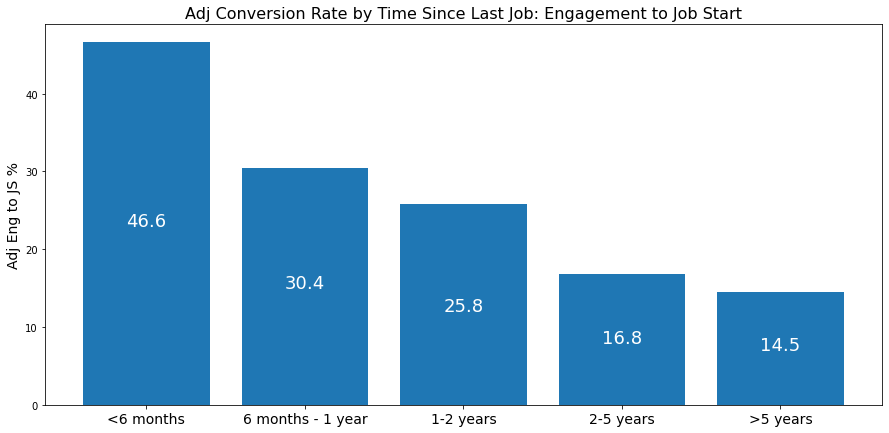

In [202]:
fig = plt.figure(figsize = (15,7))

plt.title('Adj Conversion Rate by Time Since Last Job: Engagement to Job Start', fontsize =16)
plt.bar(adj_eng_grp.index.values ,adj_eng_grp['Adj Eng to JS %'])
plt.ylabel('Adj Eng to JS %', fontsize = 14)
plt.xticks(fontsize=14)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'w', fontsize = 18)
addlabels(adj_eng_grp.index.values ,adj_eng_grp['Adj Eng to JS %'])
plt.show()

In [254]:
## Adjusting job starts data set to remove previous 3 months of job starts (to get more accurate reading on sustainments)

adj_js = job_starts[job_starts['Date of Job start'] < '2021-03-01' ]
adj_js_grp = adj_js.groupby('Time since last job').agg({'Client ID' : 'nunique',
                                                            'Date WDP aware of  13 week outcome': 'count'}).rename(columns = {'Client ID': 'Number',
                                                                                                                     'Date WDP aware of  13 week outcome': 'Sustainments'})
adj_js_grp['Adj JS to Sust %'] = round(adj_js_grp['Sustainments']/ adj_js_grp['Number'] * 100, 1)
adj_js_grp.drop('Never Worked', inplace=True)
adj_js_grp['order'] = [3,4,2,1,5]
adj_js_grp = adj_js_grp.sort_values(by = 'order')
adj_js_grp

,Number,Sustainments,Adj JS to Sust %,order
Time since last job,,,,
<6 months,76,24,31.6,1
6 months - 1 year,27,10,37.0,2
1-2 years,29,8,27.6,3
2-5 years,21,10,47.6,4
>5 years,19,11,57.9,5


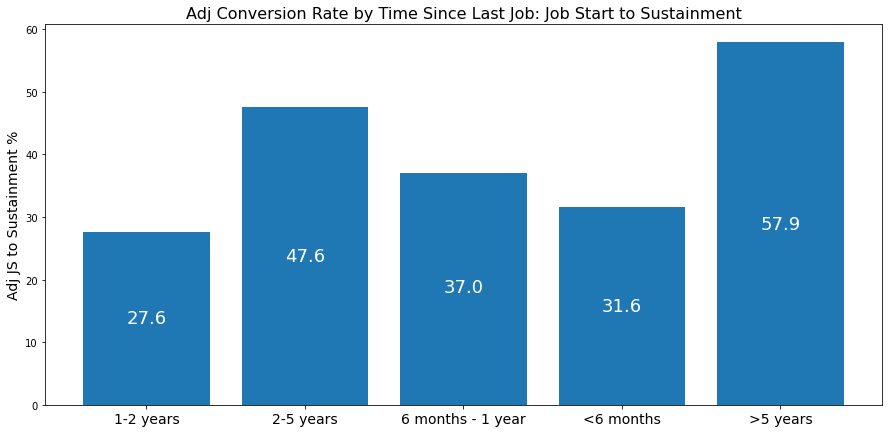

In [251]:
fig = plt.figure(figsize = (15,7))

plt.title('Adj Conversion Rate by Time Since Last Job: Job Start to Sustainment', fontsize =16)
plt.bar(adj_js_grp.index.values ,adj_js_grp['Adj JS to Sust %'])
plt.ylabel('Adj JS to Sustainment %', fontsize = 14)
plt.xticks(fontsize=14)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'w', fontsize = 18)
addlabels(adj_js_grp.index.values ,adj_js_grp['Adj JS to Sust %'])
plt.show()

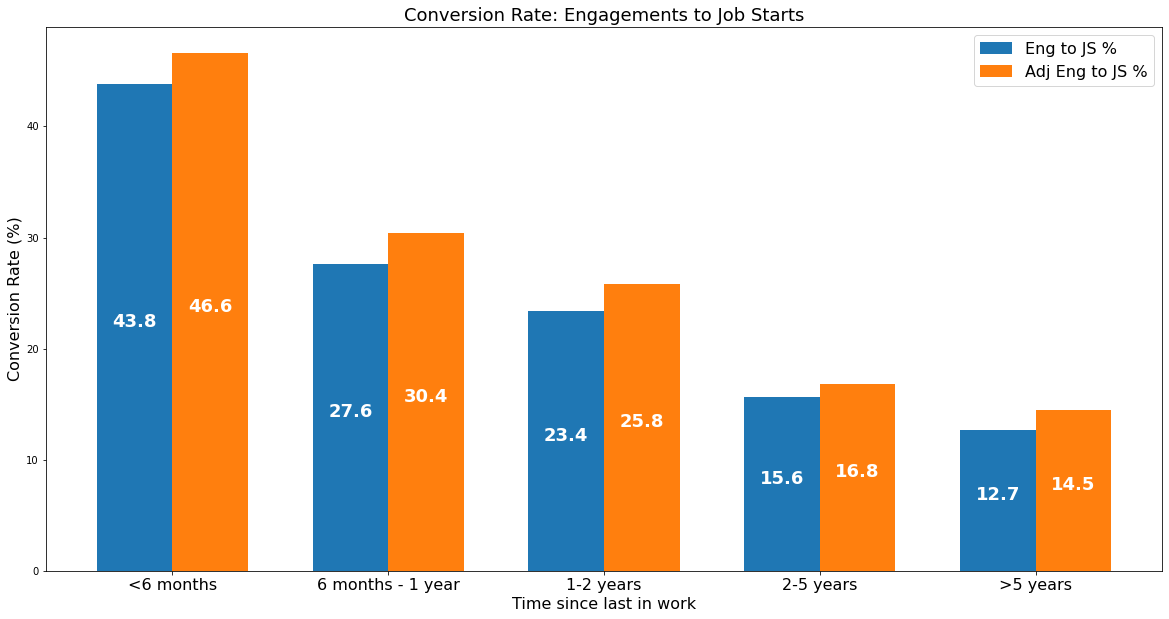

In [267]:
# engagement to job start
fig = plt.figure(figsize=(20,10))

labels = list(eng_grouped.index.values)
non_adj = eng_grouped['Eng to JS %']
adj = adj_eng_grp['Adj Eng to JS %']

x = np.arange(len(labels))
width = 0.35


plt.bar(x-width/2, non_adj, width)
plt.bar(x+width/2, adj, width)
plt.xticks(x, labels, fontsize=16)
plt.legend(['Eng to JS %', 'Adj Eng to JS %'], fontsize = 16)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+ width/2, y[i]/2, y[i], ha = 'center', color = 'w', fontsize = 18, weight = 'bold')
addlabels(x, adj)

def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i-width/2, y[i]/2, y[i], ha = 'center', color = 'w', fontsize = 18, weight = 'bold')
        
addlabels2(x, non_adj)

plt.xlabel('Time since last in work', fontsize=16)
plt.ylabel('Conversion Rate (%)', fontsize=16)
plt.title('Conversion Rate: Engagements to Job Starts', fontsize=18)
plt.show()

In [269]:
eng_grouped

,Number,Job Starts,Eng to JS %,order,% cum
Time since last job,,,,,
<6 months,185,81,43.8,1,81
6 months - 1 year,127,35,27.6,2,116
1-2 years,137,32,23.4,3,148
2-5 years,147,23,15.6,4,171
>5 years,157,20,12.7,5,191


In [270]:
adj_eng_grp

,Number,Job Starts,Adj Eng to JS %,order
Time since last job,,,,
<6 months,174,81,46.6,1
6 months - 1 year,115,35,30.4,2
1-2 years,124,32,25.8,3
2-5 years,137,23,16.8,4
>5 years,138,20,14.5,5


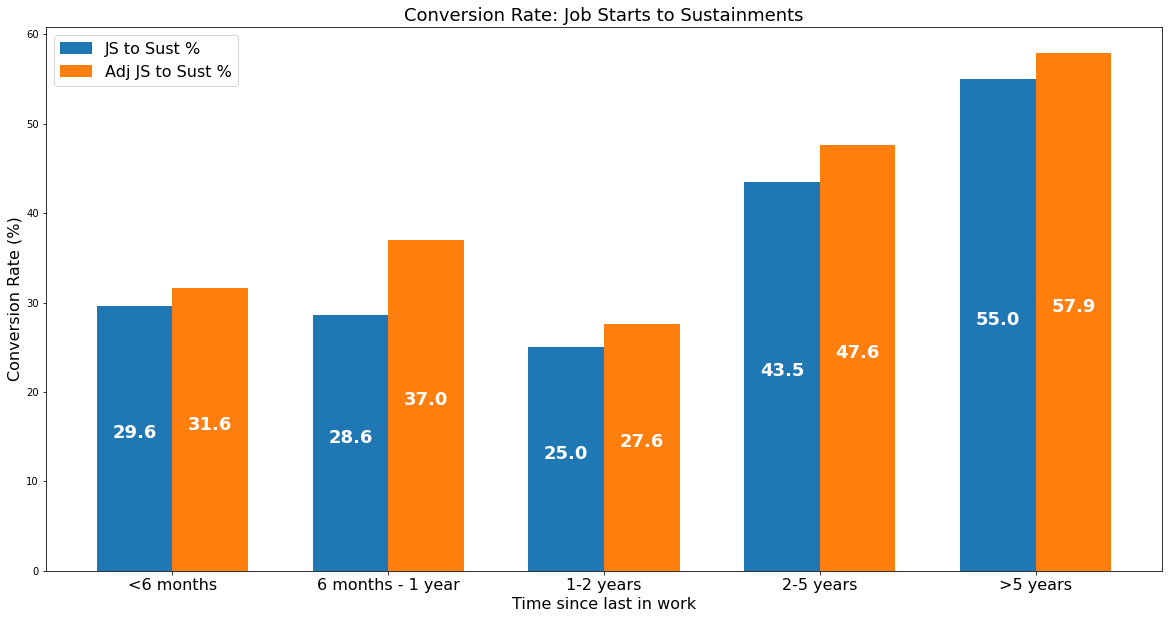

In [268]:
# engagement to job start
fig = plt.figure(figsize=(20,10))

labels = list(adj_js_grp.index.values)
non_adj = js_grouped['JS to Sustainment %']
adj = adj_js_grp['Adj JS to Sust %']

x = np.arange(len(labels))
width = 0.35


plt.bar(x-width/2, non_adj, width)
plt.bar(x+width/2, adj, width)
plt.xticks(x, labels, fontsize=16)
plt.legend(['JS to Sust %', 'Adj JS to Sust %'], fontsize = 16)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+ width/2, y[i]/2, y[i], ha = 'center', color = 'w', fontsize = 18, weight = 'bold')
addlabels(x, adj)

def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i-width/2, y[i]/2, y[i], ha = 'center', color = 'w', fontsize = 18, weight = 'bold')
        
addlabels2(x, non_adj)

plt.xlabel('Time since last in work', fontsize=16)
plt.ylabel('Conversion Rate (%)', fontsize=16)
plt.title('Conversion Rate: Job Starts to Sustainments', fontsize=18)
plt.show()